In [191]:
# http://rss.joins.com/
from bs4 import BeautifulSoup
import urllib.request as REQ 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
# 글꼴을 바꿔라
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드를 적용해라
matplotlib.rcParams['axes.unicode_minus'] = False

In [16]:
# url을 읽어와서 그거 연결시키는 부분
url = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=109'
response = REQ.urlopen(url)
# element 객체로 변환
soup = BeautifulSoup(response,'html.parser')
for location in soup.select('location'):
    print(location.city.string)
    print('='*50)
    for data in location.select('data'):
        print('날짜:',data.tmef.string)
        print('날씨:',data.wf.string)
        print('최저:',data.tmn.string)
        print('최고:',data.tmx.string)
        print('-'*50)

서울
날짜: 2019-01-25 00:00
날씨: 구름많음
최저: -5
최고: 3
--------------------------------------------------
날짜: 2019-01-25 12:00
날씨: 구름많음
최저: -5
최고: 3
--------------------------------------------------
날짜: 2019-01-26 00:00
날씨: 구름조금
최저: -7
최고: 3
--------------------------------------------------
날짜: 2019-01-26 12:00
날씨: 구름조금
최저: -7
최고: 3
--------------------------------------------------
날짜: 2019-01-27 00:00
날씨: 구름조금
최저: -6
최고: 3
--------------------------------------------------
날짜: 2019-01-27 12:00
날씨: 구름조금
최저: -6
최고: 3
--------------------------------------------------
날짜: 2019-01-28 00:00
날씨: 구름조금
최저: -4
최고: 4
--------------------------------------------------
날짜: 2019-01-28 12:00
날씨: 구름조금
최저: -4
최고: 4
--------------------------------------------------
날짜: 2019-01-29 00:00
날씨: 구름조금
최저: -4
최고: 4
--------------------------------------------------
날짜: 2019-01-29 12:00
날씨: 구름조금
최저: -4
최고: 4
--------------------------------------------------
날짜: 2019-01-30 00:00
날씨: 구름조금
최저: -3
최고: 4
--------------

날씨: 구름조금
최저: -9
최고: 3
--------------------------------------------------
날짜: 2019-01-29 12:00
날씨: 구름조금
최저: -9
최고: 3
--------------------------------------------------
날짜: 2019-01-30 00:00
날씨: 구름조금
최저: -7
최고: 5
--------------------------------------------------
날짜: 2019-01-31 00:00
날씨: 구름조금
최저: -5
최고: 6
--------------------------------------------------
날짜: 2019-02-01 00:00
날씨: 구름조금
최저: -9
최고: 3
--------------------------------------------------
동두천
날짜: 2019-01-25 00:00
날씨: 구름많음
최저: -9
최고: 4
--------------------------------------------------
날짜: 2019-01-25 12:00
날씨: 구름많음
최저: -9
최고: 4
--------------------------------------------------
날짜: 2019-01-26 00:00
날씨: 구름조금
최저: -11
최고: 2
--------------------------------------------------
날짜: 2019-01-26 12:00
날씨: 구름조금
최저: -11
최고: 2
--------------------------------------------------
날짜: 2019-01-27 00:00
날씨: 구름조금
최저: -10
최고: 4
--------------------------------------------------
날짜: 2019-01-27 12:00
날씨: 구름조금
최저: -10
최고: 4
------------------------------

날짜: 2019-01-26 12:00
날씨: 구름조금
최저: -7
최고: 3
--------------------------------------------------
날짜: 2019-01-27 00:00
날씨: 구름조금
최저: -7
최고: 4
--------------------------------------------------
날짜: 2019-01-27 12:00
날씨: 구름조금
최저: -7
최고: 4
--------------------------------------------------
날짜: 2019-01-28 00:00
날씨: 구름조금
최저: -4
최고: 3
--------------------------------------------------
날짜: 2019-01-28 12:00
날씨: 구름조금
최저: -4
최고: 3
--------------------------------------------------
날짜: 2019-01-29 00:00
날씨: 구름조금
최저: -6
최고: 3
--------------------------------------------------
날짜: 2019-01-29 12:00
날씨: 구름조금
최저: -6
최고: 3
--------------------------------------------------
날짜: 2019-01-30 00:00
날씨: 구름조금
최저: -4
최고: 5
--------------------------------------------------
날짜: 2019-01-31 00:00
날씨: 구름조금
최저: -3
최고: 5
--------------------------------------------------
날짜: 2019-02-01 00:00
날씨: 구름조금
최저: -3
최고: 8
--------------------------------------------------
군포
날짜: 2019-01-25 00:00
날씨: 구름많음
최저: -4
최고: 4
--------------

In [184]:
# url을 읽어와서 그거 연결시키는 부분
url = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=109'
response = REQ.urlopen(url)
# element 객체로 변환
soup = BeautifulSoup(response,'html.parser')
wData = []
for location in soup.select('location'):
    for data in location.select('data'):
        wData.append({'도시':location.city.string,
                      '날짜':data.tmef.string,
                      '날씨':data.wf.string,
                      '최저':int(data.tmn.string),
                      '최고':int(data.tmx.string)})

In [185]:
df = pd.DataFrame(wData)
df

,날씨,날짜,도시,최고,최저
0,구름많음,2019-01-25 00:00,서울,3,-5
1,구름많음,2019-01-25 12:00,서울,3,-5
2,구름조금,2019-01-26 00:00,서울,3,-7
3,구름조금,2019-01-26 12:00,서울,3,-7
4,구름조금,2019-01-27 00:00,서울,3,-6
5,구름조금,2019-01-27 12:00,서울,3,-6
6,구름조금,2019-01-28 00:00,서울,4,-4
7,구름조금,2019-01-28 12:00,서울,4,-4
8,구름조금,2019-01-29 00:00,서울,4,-4
9,구름조금,2019-01-29 12:00,서울,4,-4


### 연습문제
* 1. 각 도시별 최고기온, 최저기온 평균을 구하시오
* 2. 도시를 입력 받아 해당 도시 데이터를 구하시오
> 도시입력:       
> 날짜 날씨 최고 최저
* 3. 최고기온이 가장 높은 도시, 날짜 최고기온을 구하시오
* 4. 구름 많음 도시 날짜 날씨를 구하시오
* 5. 인천 지역의 날씨 데이터를 출력하시오. 단 느낌 컬럼을 추가하고 최저기온이 -5도 이하면:매우추워요
  -4~-2면:추워요, -1도 이상이면:조금추워요로 같이 표시하시오
* 6. 도시와 날짜를 인덱스로 피벗테이블로 출력하시오
* 7, 서울 지역의 날짜별 최고 최저 기온을 바차트로 그리시오
* 8. 서울지역 -5도 이하인 데이터를 구하시오
* 9. 수원지역 -5도 이하인 데이터의 비율을 구하시오
* 10. 최고기온과 최저기온의 차이가 가장 높은 도시,날짜,최저,최고를 구하시오


In [99]:
# 1. 각 도시별 최고기온, 최저기온 평균을 구하시오
g = df.groupby('도시')
g.mean()


,최고,최저
도시,,
가평,3.923077,-9.846154
강화,3.307692,-6.000000
고양,4.076923,-5.846154
과천,3.461538,-5.461538
광명,4.076923,-3.538462
광주,4.076923,-7.230769
구리,3.923077,-5.461538
군포,4.076923,-4.461538
김포,3.076923,-5.538462


In [106]:
# 2. 도시를 입력 받아 해당 도시 데이터를 구하시오
city = input('도시입력: ')
df[df['도시']==city][['날짜','날씨','최고','최저']].set_index('날짜')

도시입력: 서울


,날씨,최고,최저
날짜,,,
2019-01-25 00:00,구름많음,3,-5
2019-01-25 12:00,구름많음,3,-5
2019-01-26 00:00,구름조금,3,-7
2019-01-26 12:00,구름조금,3,-7
2019-01-27 00:00,구름조금,3,-6
2019-01-27 12:00,구름조금,3,-6
2019-01-28 00:00,구름조금,4,-4
2019-01-28 12:00,구름조금,4,-4
2019-01-29 00:00,구름조금,4,-4


In [112]:
# 3. 최고기온이 가장 높은 도시, 날짜 최고기온을 구하시오
mx = df['최고'].max()
df[df['최고']== mx][['도시','날짜','최고']]

,도시,날짜,최고
389,의왕,2019-02-01 00:00,8


In [122]:
# 4. 구름 많음 도시 날짜 날씨를 구하시오
df[df['날씨'] == '구름많음'][['도시','날짜','날씨']]

,도시,날짜,날씨
0,서울,2019-01-25 00:00,구름많음
1,서울,2019-01-25 12:00,구름많음
13,인천,2019-01-25 00:00,구름많음
14,인천,2019-01-25 12:00,구름많음
26,수원,2019-01-25 00:00,구름많음
27,수원,2019-01-25 12:00,구름많음
39,파주,2019-01-25 00:00,구름많음
40,파주,2019-01-25 12:00,구름많음
52,이천,2019-01-25 00:00,구름많음
53,이천,2019-01-25 12:00,구름많음


In [183]:
# 5. 인천 지역의 날씨 데이터를 출력하시오. 단 느낌 컬럼을 추가하고 최저기온이 
#  -5도 이하면:매우추워요 -4~-2면:추워요, -1도 이상이면:조금추워요로 같이 표시하시오
df5 = df[ df['도시']=='인천' ]
def feel( n ):
    if n <= -5:
        return '매우 추워요'
    elif n >= -4 and n <= -2:
        return '추워요'
    else:
        return '조금 추워요'
df5['느낌'] = df5['최저'].apply( feel )
df5

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,날씨,날짜,도시,최고,최저,차이,느낌
13,구름많음,2019-01-25 00:00,인천,2,-4,6,추워요
14,구름많음,2019-01-25 12:00,인천,2,-4,6,추워요
15,구름조금,2019-01-26 00:00,인천,2,-6,8,매우 추워요
16,구름조금,2019-01-26 12:00,인천,2,-6,8,매우 추워요
17,구름조금,2019-01-27 00:00,인천,2,-5,7,매우 추워요
18,구름조금,2019-01-27 12:00,인천,2,-5,7,매우 추워요
19,구름조금,2019-01-28 00:00,인천,4,-2,6,추워요
20,구름조금,2019-01-28 12:00,인천,4,-2,6,추워요
21,구름조금,2019-01-29 00:00,인천,3,-3,6,추워요
22,구름조금,2019-01-29 12:00,인천,3,-3,6,추워요


In [189]:
# 6. 도시와 날짜를 인덱스로 피벗테이블로 출력하시오
df1 = df.pivot_table(index=['도시','날짜'],values=['날씨','최고','최저'])
df1

최고  최저
도시 날짜                      
가평 2019-01-25 00:00   4 -11
   2019-01-25 12:00   4 -11
   2019-01-26 00:00   3 -13
   2019-01-26 12:00   3 -13
   2019-01-27 00:00   4 -13
   2019-01-27 12:00   4 -13
   2019-01-28 00:00   4  -5
   2019-01-28 12:00   4  -5
   2019-01-29 00:00   4 -11
   2019-01-29 12:00   4 -11
   2019-01-30 00:00   5  -8
   2019-01-31 00:00   6  -5
   2019-02-01 00:00   2  -9
강화 2019-01-25 00:00   3  -7
   2019-01-25 12:00   3  -7
   2019-01-26 00:00   1  -8
   2019-01-26 12:00   1  -8
   2019-01-27 00:00   3  -8
   2019-01-27 12:00   3  -8
   2019-01-28 00:00   4  -4
   2019-01-28 12:00   4  -4
   2019-01-29 00:00   3  -7
   2019-01-29 12:00   3  -7
   2019-01-30 00:00   5  -4
   2019-01-31 00:00   6  -3
   2019-02-01 00:00   4  -3
고양 2019-01-25 00:00   4  -7
   2019-01-25 12:00   4  -7
   2019-01-26 00:00   2  -8
   2019-01-26 12:00   2  -8
...                  ..  ..
포천 2019-01-29 12:00   4 -10
   2019-01-30 00:00   5  -6
   2019-01-31 00:00   6  -4
   2019-02-01 00:00   3  -6
하남 2019-01-25 00:00   4  -7
   2019-01-25 12:00   4  -7
   2019-01-26 00:00   2  -9
   2019-01-26 12:00   2  -9
   2019-01-27 00:00   4  -9
   2019-01-27 12:00   4  -9
   2019-01-28 00:00   3  -4
   2019-01-28 12:00   3  -4
   2019-01-29 00:00   4  -7
   2019-01-29 12:00   4  -7
   2019-01-30 00:00   5  -4
   2019-01-31 00:00   6  -3
   2019-02-01 00:00   3  -3
화성 2019-01-25 00:00   3  -6
   2019-01-25 12:00   3  -6
   2019-01-26 00:00   1  -8
   2019-01-26 12:00   1  -8
   2019-01-27 00:00   4  -7
   2019-01-27 12:00   4  -7
   2019-01-28 00:00   4  -2
   2019-01-28 12:00   4  -2
   2019-01-29 00:00   3  -6
   2019-01-29 12:00   3  -6
   2019-01-30 00:00   6  -5
   2019-01-31 00:00   6  -2
   2019-02-01 00:00   2  -4

[455 rows x 2 columns]

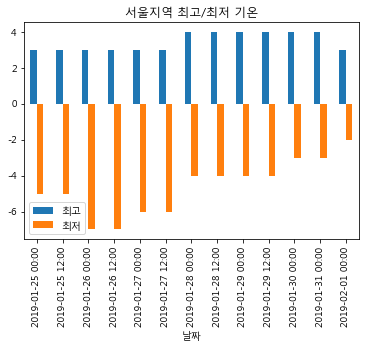

In [192]:
# 7, 서울 지역의 날짜별 최고 최저 기온을 바차트로 그리시오
g7 = df[ df['도시'] == '서울' ].set_index('날짜')
g7[['최고', '최저']].plot(kind='bar', title='서울지역 최고/최저 기온')
plt.show()

In [161]:
# 8. 서울지역 -5도 이하인 데이터를 구하시오
df1 = df[df['도시'] =='서울']
df1[df1['최저']<=-5]

,날씨,날짜,도시,최고,최저
0,구름많음,2019-01-25 00:00,서울,3,-5
1,구름많음,2019-01-25 12:00,서울,3,-5
2,구름조금,2019-01-26 00:00,서울,3,-7
3,구름조금,2019-01-26 12:00,서울,3,-7
4,구름조금,2019-01-27 00:00,서울,3,-6
5,구름조금,2019-01-27 12:00,서울,3,-6


In [195]:
# 9. 수원지역 -5도 이하인 데이터의 비율을 구하시오
idx = len(df[df['도시']=='수원'])
idx2, v2 = df[(df['도시'] == '수원') & (df['최저'] < -5)].shape
# 비율?
print('비율:',idx2/idx*100, '%')

비율: 15.384615384615385 %


In [198]:
# 10. 최고기온과 최저기온의 차이가 가장 높은 도시,날짜,최저,최고를 구하시오
df1 = df
df1['차이'] = df1['최고']-df1['최저']
df1[df1['차이'] == df1['차이'].max()][['도시','날짜','최저','최고']]

,도시,날짜,최저,최고
264,가평,2019-01-27 00:00,-13,4
265,가평,2019-01-27 12:00,-13,4
